In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [3]:
with open('data_02.json', 'r') as file: 
    data = json.loads(file.read())

df = pd.json_normalize(data['data'])
df.head()

,image,target
0,"[[[173, 172, 177], [173, 172, 177], [173, 172,...",1
1,"[[[176, 175, 180], [176, 175, 180], [176, 175,...",1
2,"[[[177, 176, 181], [177, 176, 181], [177, 176,...",1
3,"[[[194, 196, 200], [194, 196, 200], [194, 196,...",1
4,"[[[195, 199, 204], [195, 199, 204], [195, 199,...",1


In [5]:
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

,image,target
0,"[[[149, 133, 22], [149, 133, 22], [151, 135, 2...",0
1,"[[[194, 194, 194], [196, 196, 196], [196, 196,...",0
2,"[[[144, 134, 8], [149, 139, 13], [150, 140, 16...",0
3,"[[[125, 120, 65], [108, 101, 47], [103, 96, 42...",0
4,"[[[178, 186, 204], [178, 186, 204], [178, 186,...",0


In [7]:
df.shape

(2229, 2)

In [19]:
imagearray = []
for tmp in df["image"]:
    imagearray.append(np.array(tmp))
imagearray = np.array(imagearray)

In [20]:
xTrain = imagearray[:1500]
yTrain = df["target"][:1500] 
xTest = imagearray[1500:] 
yTest = df["target"][1500:]

print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(1500, 36, 36, 3) (1500,)
(729, 36, 36, 3) (729,)


In [21]:
xTrain = xTrain.astype('float32') / 255
xTest = xTest.astype('float32') / 255

Создадим нейросеть со следующей архитектурой:
<ul>
    <li>Входной слой: 32 x 32 x 3</li>
    <li>Свёрточный слой 1 (Convolution)</li>
    <li>Свёрточный слой 2</li>
    <li>Свёрточный слой 3</li>
    <li>Полносвязный слой: 10</li>
</ul>

In [22]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(36, 36, 3)),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)), #Собирает свертку в один двумерный слой
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), #Выпрямитель слоя
        layers.Dense(512, activation='relu'), #Полносвязный слой
        layers.Dropout(0.5), #Регуляризация слоя
        layers.Dense(10)
    ]
)
#Pooling - операция дискретизации

In [23]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [24]:
history = model.fit(xTrain, yTrain, batch_size=128, epochs=10, verbose=1)
model.evaluate(xTest, yTest, batch_size=128, verbose=2)

Epoch 1/10
12/12 [==============================] - 2s 85ms/step - loss: 1.5489 - accuracy: 0.3866
Epoch 2/10
12/12 [==============================] - 1s 89ms/step - loss: 0.7591 - accuracy: 0.5876
Epoch 3/10
12/12 [==============================] - 1s 90ms/step - loss: 0.3179 - accuracy: 0.9233
Epoch 4/10
12/12 [==============================] - 1s 90ms/step - loss: 0.1446 - accuracy: 0.9514
Epoch 5/10
12/12 [==============================] - 1s 93ms/step - loss: 0.0701 - accuracy: 0.9714
Epoch 6/10
12/12 [==============================] - 1s 94ms/step - loss: 0.0695 - accuracy: 0.9756
Epoch 7/10
12/12 [==============================] - 1s 91ms/step - loss: 0.0389 - accuracy: 0.9881
Epoch 8/10
12/12 [==============================] - 1s 91ms/step - loss: 0.0212 - accuracy: 0.9946
Epoch 9/10
12/12 [==============================] - 1s 92ms/step - loss: 0.0163 - accuracy: 0.9967
Epoch 10/10
12/12 [==============================] - 1s 94ms/step - loss: 0.0092 - accuracy: 0.9983
6/6 - 0s 

[0.004889198113232851, 0.9986282587051392]

<AxesSubplot:xlabel='Epoch', ylabel='Accuracy'>

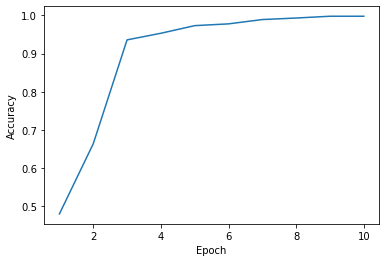

In [25]:
historyData = {}
historyData['Accuracy'] = history.history['accuracy']
historyData['Epoch'] = list(range(1, history.params['epochs'] + 1))
sns.lineplot(x="Epoch", y="Accuracy",
             data=historyData)